In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib import rc
import modelclass as mc
import modelsandbox as ms

## Illustrating solving 

In [2]:
# Use LaTeX throughout the figure for consistency
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 16})
rc('text', usetex=True)
# Figure dpi
dpi = 72

def plot_cobweb(f, r, p,  x0, y0, nmax=40,alfa=1):
    """Make a cobweb plot.

    Plot y = f(x; r ,P) and y = x for 0 <= x <= 1, and illustrate the behaviour of
    iterating x = f(x) starting at x = x0. r is a parameter to the function.

    """
    x = np.linspace(0, 1, 500)
    fig = plt.figure(figsize=(600/dpi, 450/dpi), dpi=dpi)
    ax = fig.add_subplot(111)

    # Plot y = f(x) and y = x
    ax.plot(x, f(x, r,p), c='#444444', lw=2)
    ax.plot(x, x, c='#444444', lw=2)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, y0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        py[n] = (1.-alfa) * py[n-1] + alfa*f(px[n-1], r ,p)
        
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    ax.plot(px, py, c='b', alpha=0.7)

    # Annotate and tidy the plot.
    ax.minorticks_on()
    #ax.grid(which='minor', alpha=0.5)
    #ax.grid(which='major', alpha=0.5)
    ax.set_aspect('equal')
    ax.set_xlabel('$x$')
    yannotate = '$y = 1-{:.1f} x + {:.1f} x^2$'.format(r,p)
    ax.set_title('Solving two simultaneous equations with two variables')
    ax.annotate('$x = y$', xy=(0.3, 0.3), xytext=(0.4, 0.2),
                 arrowprops=dict(facecolor='black', shrink=0.05),)
    ax.annotate(yannotate, xy=(0.19, 0.85), xytext=(0.35, 0.9),
                arrowprops=dict(facecolor='black', shrink=0.05),)
    ax.annotate('$Starting point$', xy=(x0,y0), xytext=(0.35, 0.),
                arrowprops=dict(facecolor='black', shrink=0.05),)

    #plt.savefig('cobweb_{:.1}_{:.2}.png'.format(x0, r), dpi=dpi)
    plt.show()

class AnnotatedFunction:
    """A small class representing a mathematical function.

    This class is callable so it acts like a Python function, but it also
    defines a string giving its latex representation.

    """

    def __init__(self, func, latex_label):
        self.func = func
        self.latex_label = latex_label

    def __call__(self, *args, **kwargs):
        return self.func(*args, **kwargs)

In [3]:
func = AnnotatedFunction(lambda x,r,p: 1+-r*x + p*x*x, r'$y = 1-r x + p x^2$')

### A nice model

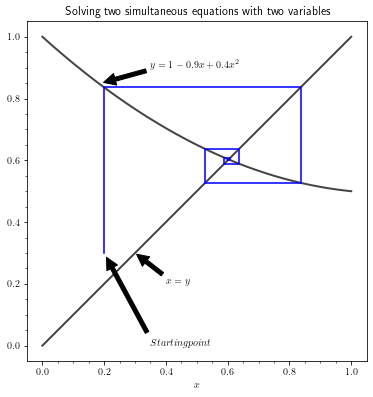

In [4]:
plot_cobweb(func, 0.9,0.4, 0.2,0.3,100,alfa=1)

### A diverging model 

The solution explodes 

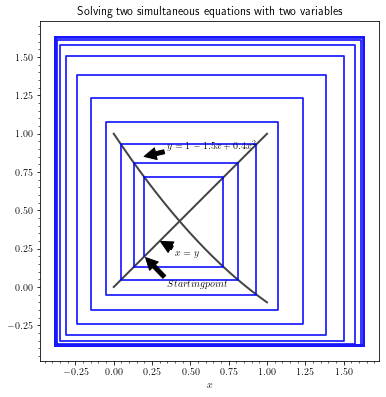

In [5]:
plot_cobweb(func, 1.5,0.4, 0.2,0.2,100,alfa=1.)

### A damped diverging model 

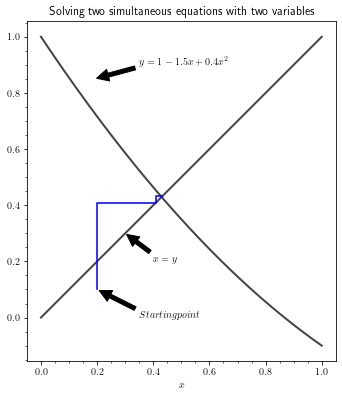

In [6]:
plot_cobweb(func, 1.5,0.4, 0.2,0.1,100,alfa=0.5)

## A simultaneous model in Modelflow 

In [7]:
fx = '''
FRML <Z> y  = 1-r*x +p*x**2 $ 
FRML xx  x  = y $ 
'''
mx = mc.model(fx,name='A simultanelus model')

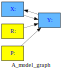

In [8]:
mx.drawmodel(size=(1,1))

In [9]:
df = pd.DataFrame({'X' : [0.2,0.2] , 'Y' :[0.,0.] , 'R':[1.,0.4] , 'P':[0.,0.4]})
df

X    Y    R    P
0  0.2  0.0  1.0  0.0
1  0.2  0.0  0.4  0.4

In [10]:
gauss = mx(df,max_iterations=100,dumpvar='X Y',ldumpvar=True,alfa=0.8,silent=0)

Will start solving: testmodel
Create compiled solving function for testmodel
ljit=False stringjit=True  transpile_reset=False  hasattr(self, f"pro_{jitname}")=False
now makelos makes a sim solvefunction
0 Solved in 31 iterations
1 Solved in 22 iterations
testmodel solved  


In [11]:
mx.dumpdf

per  iteration         X         Y
0     0          0  0.200000  0.000000
1     0          1  0.640000  0.640000
2     0          2  0.416000  0.416000
3     0          3  0.550400  0.550400
4     0          4  0.469760  0.469760
5     0          5  0.518144  0.518144
6     0          6  0.489114  0.489114
7     0          7  0.506532  0.506532
8     0          8  0.496081  0.496081
9     0          9  0.502351  0.502351
10    0         10  0.498589  0.498589
11    0         11  0.500847  0.500847
12    0         12  0.499492  0.499492
13    0         13  0.500305  0.500305
14    0         14  0.499817  0.499817
15    0         15  0.500110  0.500110
16    0         16  0.499934  0.499934
17    0         17  0.500039  0.500039
18    0         18  0.499976  0.499976
19    0         19  0.500014  0.500014
20    0         20  0.499991  0.499991
21    0         21  0.500005  0.500005
22    0         22  0.499997  0.499997
23    0         23  0.500002  0.500002
24    0         24  0.499999  0.499999
25    0         25  0.500001  0.500001
26    0         26  0.500000  0.500000
27    0         27  0.500000  0.500000
28    0         28  0.500000  0.500000
29    0         29  0.500000  0.500000
30    0         30  0.500000  0.500000
31    0         31  0.500000  0.500000
32    0         32  0.500000  0.500000
33    1          0  0.200000  0.000000
34    1          1  0.748800  0.748800
35    1          2  0.889568  0.889568
36    1          3  0.946478  0.946478
37    1          4  0.973085  0.973085
38    1          5  0.986236  0.986236
39    1          6  0.992903  0.992903
40    1          7  0.996326  0.996326
41    1          8  0.998094  0.998094
42    1          9  0.999010  0.999010
43    1         10  0.999485  0.999485
44    1         11  0.999733  0.999733
45    1         12  0.999861  0.999861
46    1         13  0.999928  0.999928
47    1         14  0.999962  0.999962
48    1         15  0.999980  0.999980
49    1         16  0.999990  0.999990
50    1         17  0.999995  0.999995
51    1         18  0.999997  0.999997
52    1         19  0.999999  0.999999
53    1         20  0.999999  0.999999
54    1         21  1.000000  1.000000
55    1         22  1.000000  1.000000
56    1         23  1.000000  1.000000

In [ ]:
mx.show_iterations('X')

In [ ]:
gauss